Notebook 2, Module 1, Data Aquisition and Data Management, CAS Applied Data Science, 2023-08-24, S. Haug, University of Bern.

# 1. Visualisation of Data - Examples

**Learning outcomes:**

Participants will be able to make good data science plots, with praxis on
- plot line charts from series and dataframes
- plot histograms
  - understand the effect of binning
- plot scatter plots
- plot box plots
- plot error bars
- formatting of plots
- geoplotting

**Introduction Slides**
- https://docs.google.com/presentation/d/1HhRIIVq46DyVNm68WeTqr_vZvOgSMWBZa2XDwWNH8H4/edit?usp=sharing

**Further sources**
- Python: https://pandas.pydata.org/pandas-docs/stable/visualization.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
- Get inspired here : https://matplotlib.org/gallery/index.html

Here you have examples on plotting possibilities with pandas. They make data science plotting very easy and fast. However, you may have special needs that are not supported. Then you can use the underlaying plotting module **matplotlib**.

Plotting is an art and you can spend enourmous amounts of time doing plotting. There are many types of plots. You may invent your own type. We only show some examples and point out some important things. If you need to go further, you have to work indepentently.

Some vocabulary and plots are only understandable with corresponding statistics background. This is part of module 2.

### 0. Load the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt # seaborn ist auch eine library, die viel benutzt wird
import pandas as pd

### 1. Plot line charts (time series)

First we use the data structure Series (one dimensional).

<Axes: >

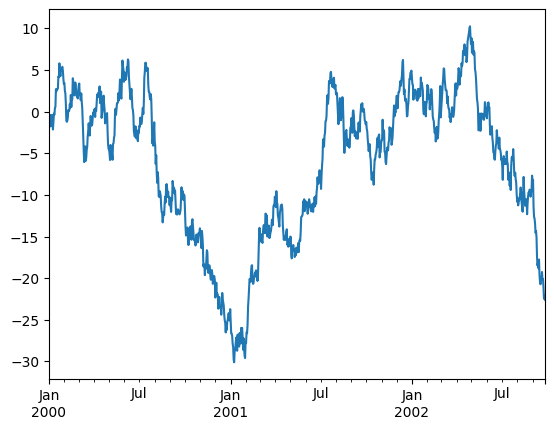

In [11]:
# Generate 1000 random numbers for 1000 days from the normal distribution
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) #ohne argument sind die Randomnummern um 0 zentriert, mit 1 Stdev
ts = ts.cumsum() #kumuliert alle Zufallszahlen
ts.head(15)
ts.plot()
#plt.show() #nur nötig wenn mehrere Plots pro Zelle gezeigt werden sollen

We can generate 4 time series, keep them in a dataframe and plot them all four.

                 CAS       Bin         C         D
2000-01-01  0.458677  1.278908  1.396595 -1.553747
2000-01-02 -0.350167  0.063486  0.049621 -1.333227
2000-01-03 -2.077814  0.402499 -0.464104 -1.526311
2000-01-04 -0.528913  0.806511 -0.761229  1.299041
2000-01-05  0.739527 -0.998888  0.046920 -0.059089
...              ...       ...       ...       ...
2002-09-22 -1.045260 -0.839962  2.127991  0.201963
2002-09-23  1.193865  0.363436 -1.609974  2.172965
2002-09-24 -0.253393 -1.614215 -0.783151 -0.068310
2002-09-25  0.931637 -0.819663  0.316261 -1.740613
2002-09-26  0.683701 -1.330652 -0.527216  0.228367

[1000 rows x 4 columns]


<Figure size 640x480 with 0 Axes>

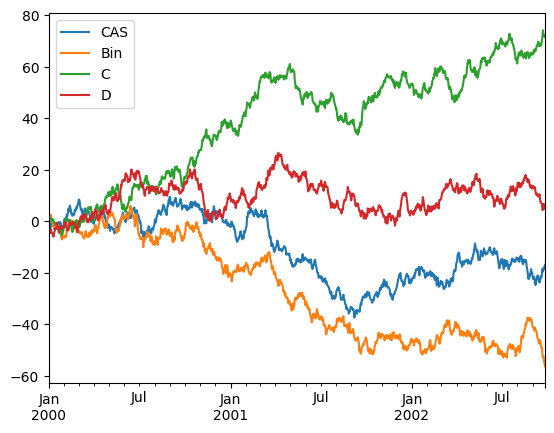

In [24]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['CAS','Bin','C','D'])
print (df)
df_cumsum = df.cumsum()
plt.figure()
df_cumsum.plot()
plt.show()

### 2. Plot histograms (frequency plots)

For this we use our Iris dataset.

In [54]:
filepath = 'https://raw.githubusercontent.com/sigvehaug/CAS-Applied-Data-Science/master/Module-1/iris.csv'
df = pd.read_csv(filepath,names=['slength','swidth','plength','pwidth','species']) # data type is a string (str), i.e. not converted into numbers
df.head() # print first 5 lines of data

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plot two histograms with a legend in the same graph.

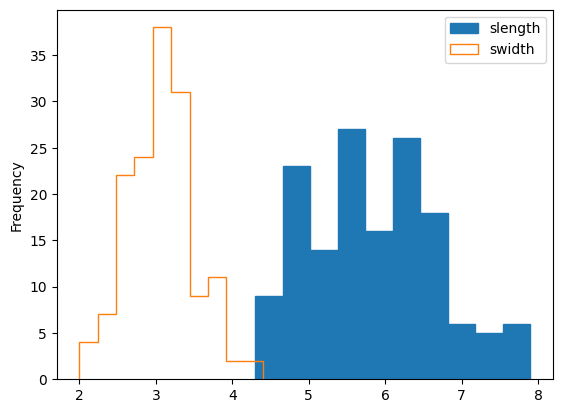

In [26]:
df['slength'].plot(kind="hist",fill=True,histtype='step',label='slength') #without arguments, it takes "optimal" bin size (number of bars)
df['swidth'].plot(kind="hist",fill=False,histtype='step',label='swidth')
plt.legend()
plt.show()

### The effect of binning

When data is binned (or sampled) the bin size effects the amount of counts in each bin. Counts fluctuate like a normal distribution for counts above about 20. So depending on your bin size, the same data may look differently.

Hard binning (small bin size) may introduce pure statistical structures without any other meaning. This is then overfitting. Too big bin sizes may wipe out structures in the data (underfitting). If known, a bin size guided by the physical resolution of the sensor is close to optimal.

Plot the same histograms with a different binning.

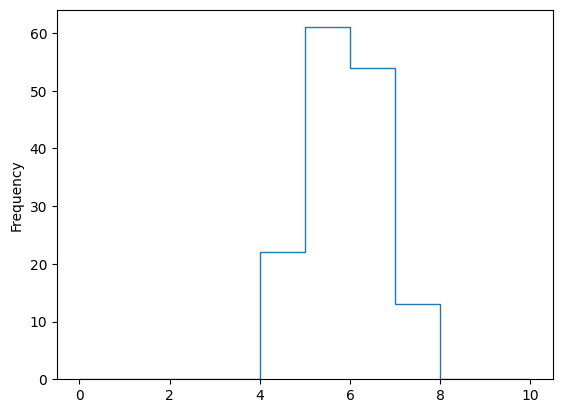

In [41]:
df['slength'].plot(bins=10,range=(0,10), kind="hist",fill=False,histtype='step')
plt.show()

### Always label the axes (also with units)

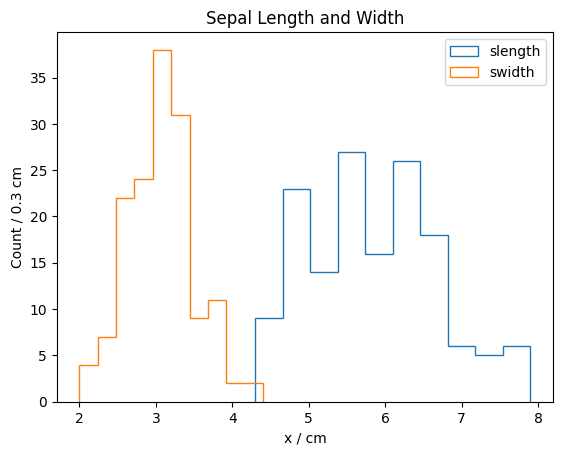

In [55]:
ax = df['slength'].plot(kind="hist",fill=False,histtype='step',label='slength')
df['swidth'].plot(kind="hist",fill=False,histtype='step',label='swidth')
ax.set_xlabel('x / cm')
ax.set_ylabel('Count / 0.3 cm')
ax.set_title('Sepal Length and Width')
plt.legend()
plt.show()

In [50]:
s_df = df[df['species']=='Iris-setosa'] # ab hier werden nur noch Iris setosa angeschaut, da die anderen Spezies andere Eigenschaften haben (ev. auch Effekt auf obige Plots!)

### 3. Scatter plots

Scatter plots show how the data is distributed in two dimensions. They are good for finding (anti) correlations between two variables. We plot several plots in one figure.

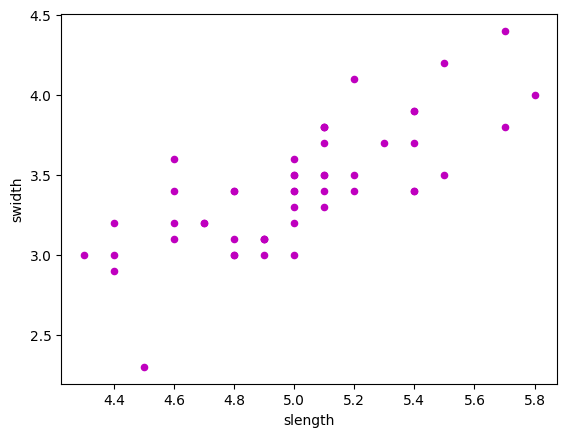

In [59]:
s_df.plot(x='slength',y='swidth',kind="scatter",c='m') #c: color, c=cyan, m=magenta ...
plt.show()

With the plotting module there are some nice tools. For example authomatic plotting of all scatter plots.

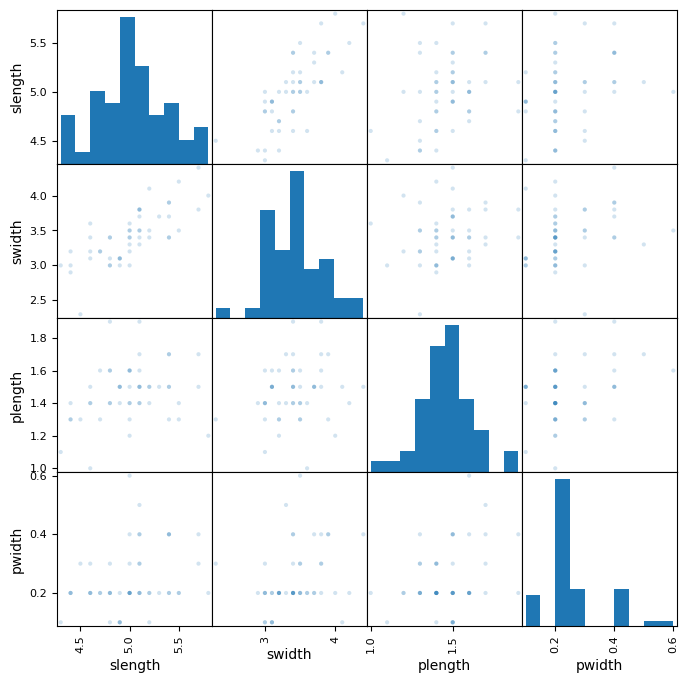

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[df['species']=='Iris-setosa'], alpha=0.2, figsize=(8, 8), diagonal='hist')
plt.show()

There are several other tools too. See https://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4. Box plots

Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column.

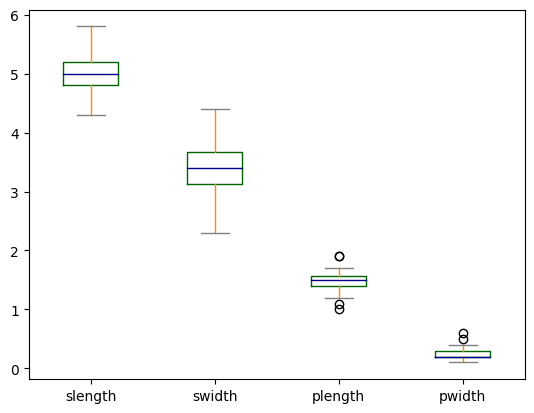

In [64]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')
s_df.plot.box(color=color)
#df.plot.box(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
plt.show()

Box plots are non-parametric. The box shows the first second and third quartiles. The whiskers may be standard deviations or other percentiles.

### 5. Plotting with error bars

There is no science without error bars, or better, uncertainties. The meaning of uncertainties is discussed in module 2. Here we only show by example  how to plot uncertainties.

Plotting with error bars is supported in DataFrame.plot() and Series.plot().

Horizontal and vertical error bars can be supplied to the xerr and yerr keyword arguments to plot(). The error values can be specified using a variety of formats:

- As a DataFrame or dict of errors with column names matching the columns attribute of the plotting DataFrame or matching the name attribute of the Series.
- As a str indicating which of the columns of plotting DataFrame contain the error values.
- As raw values (list, tuple, or np.ndarray). Must be the same length as the plotting DataFrame/Series.

Asymmetrical error bars are also supported, however raw error values must be provided in this case. For a M length Series, a Mx2 array should be provided indicating lower and upper (or left and right) errors. For a MxN DataFrame, asymmetrical errors should be in a Mx2xN array.

Here is an example using an error dataframe (symmetric uncertainties).

<Axes: >

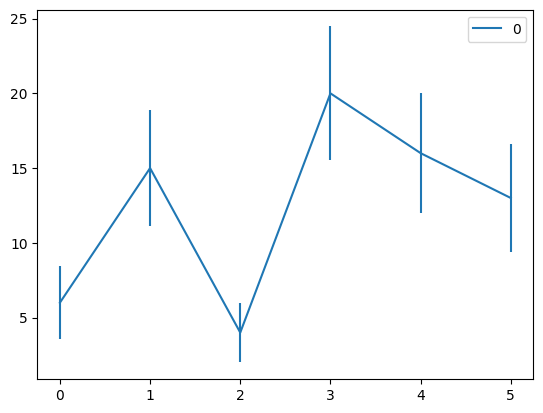

In [66]:
my_df   = pd.DataFrame([6,15,4,20,16,13]) # Some random data
my_df_e = (my_df)**0.5 # The error dataframe, square root of the sum of all values is the stdev
my_df.plot(yerr=my_df_e) # xerr könnte man auch noch plotten, macht aber oft keinen Sinn
#plt.show()

### 6. Formatting plots

Plots can easily be formatted with keywords. One can adjust colors, types of shading, lines, axes, legends, titles, etc. Some formatting has been exemplified above. More examples are in the documentation. https://pandas.pydata.org/pandas-docs/stable/visualization.html

With the matplotlib module you are even more flexible. See https://matplotlib.org/gallery/index.html for inspirations.

### 7. Summary

- Do you remember three important plot types?
- What can the binning of a histogram do to the interpretation of it?
- What are the three parts of the general communication process?
- Can you mention three important points to include in plots and their figure legends?


### 8 Plotting Geodata

Often is very nice to visualise data on geographical maps. Fortunately people have written packages helpin us with that. This is an example how the geopandas package can be used.

You need to install geopandas (if you use Anaconda, the Anaconda Navigator in the environment you are using. Geopandas is part repository/channel conda-forge). This you may do at home or now or just follow Sigve showing you this example on colab.



First we need the so called shape files. They are provided by [swisstopo](https://www.swisstopo.admin.ch/en/geodata/landscape/boundaries3d.html/). For convenience I have a version on the CAS github repositoy.

On Linux (colab is running linux) we get and unpack the files like this:



In [67]:
#! wget http://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
! wget https://github.com/sigvehaug/CAS-Applied-Data-Science/raw/master/Module-1/CHE_adm.zip
! mkdir -p data
! unzip CHE_adm.zip -d data

--2023-08-24 12:54:55--  https://github.com/sigvehaug/CAS-Applied-Data-Science/raw/master/Module-1/CHE_adm.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sigvehaug/CAS-Applied-Data-Science/master/Module-1/CHE_adm.zip [following]
--2023-08-24 12:54:56--  https://raw.githubusercontent.com/sigvehaug/CAS-Applied-Data-Science/master/Module-1/CHE_adm.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3559904 (3.4M) [application/zip]
Saving to: ‘CHE_adm.zip’

CHE_adm.zip         100%[===================>]   3.39M  --.-KB/s    in 0.08s   

2023-08-24 12:54:56 (40.7 MB/s) - ‘CHE_adm.zip’ saved [3

In [68]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import os


Now we merge some numbers per canton (covid cases at some point in the past) with the shape files.

In [75]:
shape_file = 'data/CHE_adm1.shp'
data_file  = 'https://raw.githubusercontent.com/sigvehaug/CAS-Applied-Data-Science/master/Module-1/covid-per-canton.csv'
map_df = gpd.read_file(shape_file) #geopandas shape dataframe
cantons_df = pd.read_csv(data_file)
cantons_df
map_df
merged_df = map_df.merge(cantons_df, how="left", left_on="NAME_1", right_on="CANTON") #left dataframe = map, right dataframe = cases/canton, merged with key canton=name_1
merged_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,CANTON,ACR,INHABITANTS,VIRUSCASESCONFIRMED
0,223,CHE,Switzerland,1,Aargau,Canton|Kanton|Chantun,Canton,NaN,Argovia|Arg¢via|Argovie,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",Aargau,AG,677387,26
1,223,CHE,Switzerland,2,Appenzell Ausserrhoden,Canton|Kanton|Chantun,Canton,NaN,Appenzell Ausser-Rhoden|Appenzell Outer Rhodes...,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",Appenzell Ausserrhoden,AR,55234,3
2,223,CHE,Switzerland,3,Appenzell Innerrhoden,Canton|Kanton|Chantun,Canton,NaN,Appenzell Inner-Rhoden|Appenzell Inner Rhodes|...,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",Appenzell Innerrhoden,AI,16145,0
3,223,CHE,Switzerland,4,Basel-Landschaft,Canton|Kanton|Chantun,Canton,NaN,Bâle-Campagne|Basel-Country|Baselland|Basel-La...,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",Basel-Landschaft,BL,288132,41
4,223,CHE,Switzerland,5,Basel-Stadt,Canton|Kanton|Chantun,Canton,NaN,Bâle-Ville|Basel-City|Basel-Town|Basilea-Citad...,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",Basel-Stadt,BS,194766,100
5,223,CHE,Switzerland,6,Bern,Canton|Kanton|Chantun,Canton,NaN,Berna|Berne,"MULTIPOLYGON (((7.09284 46.89419, 7.09202 46.8...",Bern,BE,1034977,69
6,223,CHE,Switzerland,7,Fribourg,Canton|Kanton|Chantun,Canton,NaN,Freiburg|Friburg|Friburgo,"MULTIPOLYGON (((6.78581 46.74974, 6.78684 46.7...",Fribourg,FR,318714,31
7,223,CHE,Switzerland,8,Genève,Canton|Kanton|Chantun,Canton,NaN,Cenevre|Genebra|Geneve|Geneva|Genevra|Genf|Gin...,"MULTIPOLYGON (((6.18406 46.34775, 6.18559 46.3...",Genève,GE,499480,103
8,223,CHE,Switzerland,9,Glarus,Canton|Kanton|Chantun,Canton,NaN,Glaris|Glarona|Glaruna,"POLYGON ((9.07083 47.13050, 9.07307 47.12995, ...",Glarus,GL,40403,3
9,223,CHE,Switzerland,10,Graubünden,Canton|Kanton|Chantun,Canton,NaN,Graubünden|Grigioni|Grischun|Grisons,"MULTIPOLYGON (((10.22766 46.61207, 10.22734 46...",Graubünden,GR,198379,43


   ACR  VIRUSCASESCONFIRMED
0   AG                   26
1   AR                    3
2   AI                    0
3   BL                   41
4   BS                  100
5   BE                   69
6   FR                   31
7   GE                  103
8   GL                    3
9   GR                   43
10  JU                    7
11  LU                    9
12  NE                   38
13  NW                    0
14  OW                    1
15  SG                   16
16  SH                    1
17  SZ                   12
18  SO                    6
19  TG                    4
20  TI                  250
21  UR                    0
22  VS                   43
23  VD                  254
24  ZH                  119
25  ZG                    8


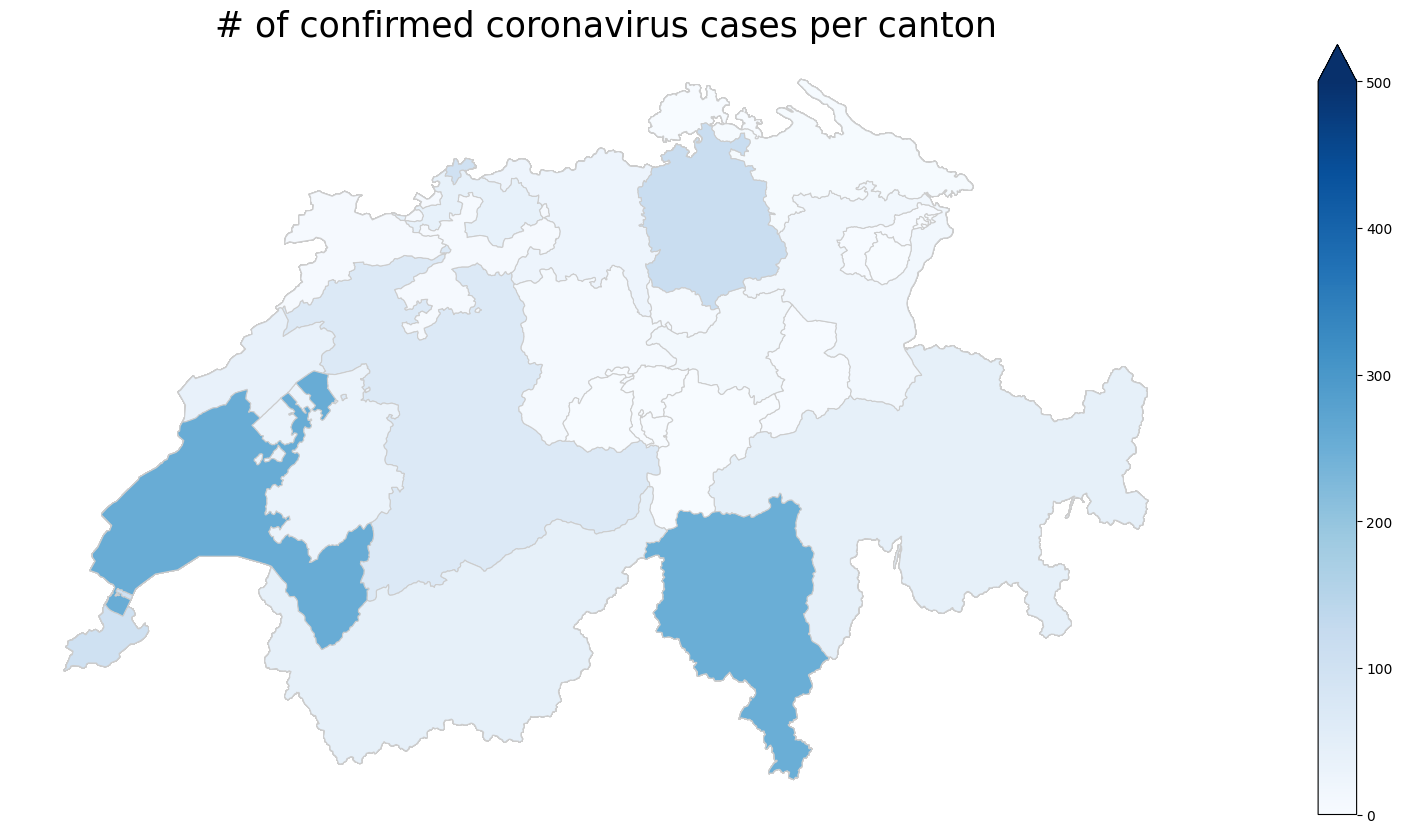

In [76]:
def plotmap(df, datacol, vmax, filename, title): #def schreibt eine Funktion, kann dann "gecalled" werden
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))
    fig, ax = plt.subplots(1, figsize=(30, 10))
    ax.axis("off")
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    ax.annotate("Sources: BAG, WP, ZHAW SPLab", xy=(0.68, 0.11),
    xycoords='figure fraction', fontsize=12, color='#555555')
    sm.set_array([])
    fig.colorbar(sm, ax=ax, extend="max")
    df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
    df['coords'] = [coords[0] for coords in df['coords']]
    for idx, row in df.iterrows():
        #plt.annotate(s=row['NAME_0'], xy=row['coords'],horizontalalignment='center')
        df.plot(column=datacol, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', vmax=vmax)
    fig.savefig(filename, dpi=150)

print(merged_df[["ACR", "VIRUSCASESCONFIRMED"]])
plotmap(merged_df, "VIRUSCASESCONFIRMED", 500, "map_absolute.png", "# of confirmed coronavirus cases per canton")

# If you want file names with day information, use code below
#os.makedirs("dailymaps", exist_ok=True)
#stamp = datetime.datetime.now().strftime("%Y%m%d")
#hdate = datetime.datetime.now().strftime("%d.%m.%Y")
#plotmap(merged_df, "VIRUSCASESCONFIRMED", 500, f"dailymaps/map_abs_{stamp}.png", f"# of confirmed coronavirus cases per canton [{hdate}]")


# End of the prepared data visualisation examples.

Feel free to play on your own. You should make some good plots of your dataset for the project report.